In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [67]:
# test file (much shorter)
test_file = "../pypy-benchmarks/unladen_swallow/performance/event_file_test.csv"
# actual
in_file = "../pypy-benchmarks/unladen_swallow/performance/event_file_bm_ai_mini.csv"
# load the csv file
raw = pd.read_csv( in_file, names=["event", "cyc", "foo"] )


In [68]:
raw = raw.set_index("cyc")

In [175]:
raw_no_gc = raw[ raw["event"].map( lambda x: not x.startswith("gc") ) ]

In [232]:
pd.DataFrame( [["foo"]], columns=["event"], index=[0] ).append( raw )

,event,foo
0,foo,NaN
70532,gc_minor_start,NaN
111976,gc_minor_stop,NaN
4833555,gc_minor_start,NaN
6022367,gc_minor_stop,NaN
12305925,gc_minor_start,NaN
13730857,gc_minor_stop,NaN
19453946,gc_minor_start,NaN
20503073,gc_minor_stop,NaN
25163855,gc_minor_start,NaN


In [214]:
raw

,event,foo
cyc,,
70532,gc_minor_start,NaN
111976,gc_minor_stop,NaN
4833555,gc_minor_start,NaN
6022367,gc_minor_stop,NaN
12305925,gc_minor_start,NaN
13730857,gc_minor_stop,NaN
19453946,gc_minor_start,NaN
20503073,gc_minor_stop,NaN
25163855,gc_minor_start,NaN


In [193]:
# categorization function
def event_cat( row, no_gc_row=None ):
    event = row["event"]
    # if gc stop, we find the event w/o gc, if provided
    if no_gc_row is not None and ( event.startswith("gc_minor_stop") or event.startswith("gc_major_stop") ):
        return event_cat( no_gc_row )
    elif event.startswith("gc_minor_start") or event.startswith("gc_major_start"):
        return "gc"
    elif event.startswith("tracing_start"):
        return "tracing"
    elif event.startswith("blackhole_start") or event.startswith("blackhole_stop_leave"):
        return "blackhole"
    elif event.startswith("jit") or event.startswith("finish"):
        return "jit"
    return "other"

In [17]:
#raw["event_cat"] = raw.apply( event_cat, axis=1 )

In [27]:
raw.index.searchsorted(50000000)

338

In [194]:
# find max cycle
max_cycle = raw.index[-1]
num_points = 10000
quant = max_cycle/num_points
plot_df = pd.DataFrame( [i*quant for i in range(num_points)], columns=["cyc"] )
# we use searchsorted - 1 to find the last activated event. this is an issue in gc, where different events might
# have triggered it. so we pass both w/ gc and w/o gc closest find, and pick the w/o gc even in case the last find
# was gc stop
plot_df["event"] = plot_df.apply( lambda x: event_cat(
                            raw.iloc[ raw.index.searchsorted(x["cyc"])-1 ],
                            raw_no_gc.iloc[ raw_no_gc.index.searchsorted(x["cyc"])-1 ] ), axis=1 )
event_map = { "other" : 0, "gc" : 1, "tracing": 2, "blackhole": 3, "jit" : 4 }
plot_df["event_id"] = plot_df.apply( lambda x : event_map.get(x["event"]), axis=1 )

In [187]:
plot_df

,cyc,event,event_id
0,0,other,0
1,379497,other,0
2,758994,other,0
3,1138491,other,0
4,1517988,other,0
5,1897485,other,0
6,2276982,other,0
7,2656479,other,0
8,3035976,other,0
9,3415473,other,0


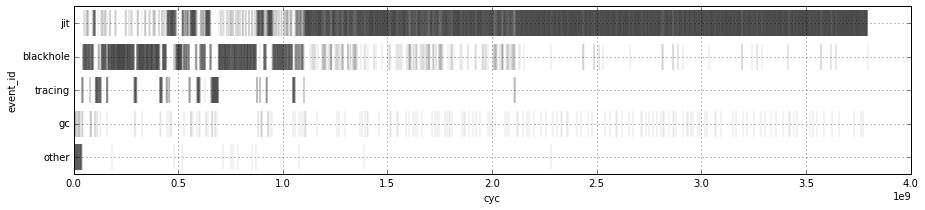

In [195]:
fig, ax = plt.subplots()
# hacky: set the category types here. plot also tries to plot -1 as well, so we use an empty string to ensure
# things work out
ax.set_yticklabels( [ "", "other", "gc", "tracing", "blackhole", "jit"] )
# hacky: use vertical line scatter plot and stretch it (grow 700 times, make line width very narrow)
plot_df.plot( kind="scatter", x="cyc", y="event_id", c='black', ylim=[-0.5, 4.5], xlim=0, marker='|', s=700, lw=0.1, figsize=[15,3], ax=ax )

In [189]:
plot_df["event"] = plot_df.apply( lambda x: event_cat( raw_no_gc.iloc[ raw_no_gc.index.searchsorted(x["cyc"])-1 ]), axis=1 )
plot_df["event_id"] = plot_df.apply( lambda x : event_map.get(x["event"]), axis=1 )

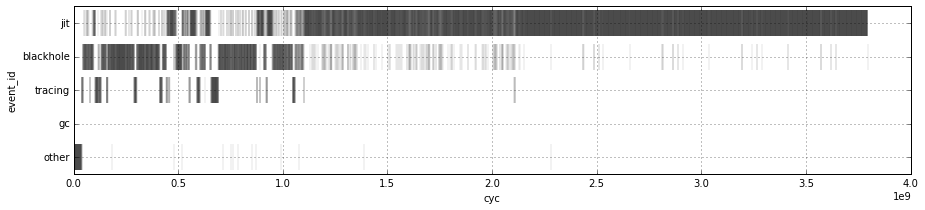

In [190]:
fig, ax = plt.subplots()
# hacky: set the category types here. plot also tries to plot -1 as well, so we use an empty string to ensure
# things work out
ax.set_yticklabels( [ "", "other", "gc", "tracing", "blackhole", "jit"] )
# hacky: use vertical line scatter plot and stretch it (grow 700 times, make line width very narrow)
plot_df.plot( kind="scatter", x="cyc", y="event_id", c='black', ylim=[-0.5, 4.5], xlim=0, marker='|', s=700, lw=0.1, figsize=[15,3], ax=ax )

In [289]:
def activity_plot_from_csv_old( csv_file ):
    # load the csv file
    raw = pd.read_csv( csv_file, names=["event", "cyc", "foo"] )
    raw = raw.set_index("cyc", drop=False)
    # add an event so that we start with other
    raw = pd.DataFrame( [["foo"]], columns=["event"], index=[0] ).append( raw )
    raw_no_gc = raw[ raw["event"].map( lambda x: not x.startswith("gc") ) ]
    
    # find max cycle
    max_cycle = raw.index[-1]
    num_points = 10000
    quant = max_cycle/num_points
    plot_df = pd.DataFrame( [i*quant for i in range(num_points)], columns=["cyc"] )
    # we use searchsorted - 1 to find the last activated event. this is an issue in gc, where different events might
    # have triggered it. so we pass both w/ gc and w/o gc closest find, and pick the w/o gc even in case the last find
    # was gc stop
    plot_df["event"] = plot_df.apply( lambda x: event_cat(
                            raw.iloc[ raw.index.searchsorted(x["cyc"])-1 ],
                            raw_no_gc.iloc[ raw_no_gc.index.searchsorted(x["cyc"])-1 ] ), axis=1 )
    event_map = { "other" : 0, "gc" : 1, "tracing": 2, "blackhole": 3, "jit" : 4 }
    plot_df["event_id"] = plot_df.apply( lambda x : event_map.get(x["event"]), axis=1 )
    
    fig, ax = plt.subplots()
    
    # hacky: set the category types here. plot also tries to plot -1 as well, so we use an empty string to ensure
    # things work out
    ax.set_yticklabels( [ "", "other", "gc", "tracing", "blackhole", "jit"] )
    # hacky: use vertical line scatter plot and stretch it (grow 700 times, make line width very narrow)
    plot_df.plot( kind="scatter", x="cyc", y="event_id", c='black', ylim=[-0.5, 4.5], xlim=0, marker='|', s=700, lw=0.1, figsize=[15,3], ax=ax )
    return raw

In [290]:
def activity_plot_from_csv( csv_file ):
    # load the csv file
    raw = pd.read_csv( csv_file )
    raw = raw.set_index( "insts", drop=False )
    # add an event so that we start with other
    raw = pd.DataFrame( [["foo"]], columns=["event"], index=[0] ).append( raw )
    raw_no_gc = raw[ raw["event"].map( lambda x: not x.startswith("gc") ) ]
    
    # find max cycle
    max_cycle = raw.index[-1]
    num_points = 10000
    quant = max_cycle/num_points
    plot_df = pd.DataFrame( [i*quant for i in range(num_points)], columns=["insts"] )
    # we use searchsorted - 1 to find the last activated event. this is an issue in gc, where different events might
    # have triggered it. so we pass both w/ gc and w/o gc closest find, and pick the w/o gc even in case the last find
    # was gc stop
    plot_df["event"] = plot_df.apply( lambda x: event_cat(
                            raw.iloc[ raw.index.searchsorted(x["insts"])-1 ],
                            raw_no_gc.iloc[ raw_no_gc.index.searchsorted(x["insts"])-1 ] ), axis=1 )
    event_map = { "other" : 0, "gc" : 1, "tracing": 2, "blackhole": 3, "jit" : 4 }
    plot_df["event_id"] = plot_df.apply( lambda x : event_map.get(x["event"]), axis=1 )
    
    fig, ax = plt.subplots()
    
    # hacky: set the category types here. plot also tries to plot -1 as well, so we use an empty string to ensure
    # things work out
    ax.set_yticklabels( [ "", "other", "gc", "tracing", "blackhole", "jit"] )
    # hacky: use vertical line scatter plot and stretch it (grow 700 times, make line width very narrow)
    plot_df.plot( kind="scatter", x="insts", y="event_id", c='black', ylim=[-0.5, 4.5], xlim=0, marker='|', s=700, lw=0.1, figsize=[15,3], ax=ax )
    return raw

In [319]:
def find_event( raw_df, start_insts, len_insts, event="blackhole_stop_exc" ):
    # filter out all the events and just leave the event we're looking for
    raw_df = raw_df.query( "event == @event" )
    #print raw_df
    # start iterating from the first match
    row = raw_df.iloc[ raw_df.index.searchsorted( start_insts ) ]
    start_threshold = ( row.insts, row.iter )
    row = raw_df.iloc[ raw_df.index.searchsorted( row.insts + len_insts ) ]
    end_threshold = ( row.insts, row.iter )
            
    return start_threshold, end_threshold

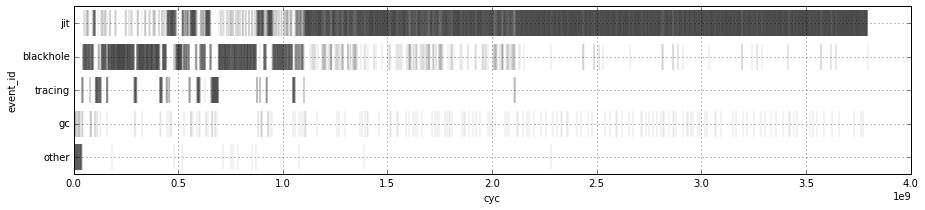

In [281]:
raw = activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_ai_mini.csv" )

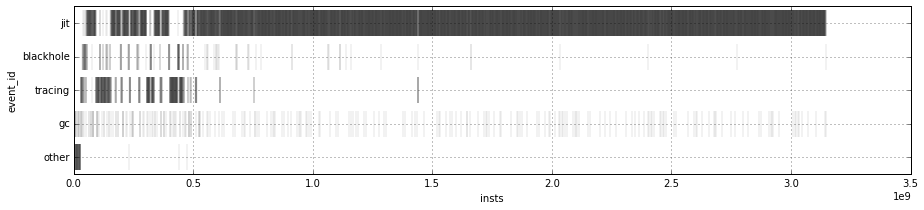

In [291]:
raw = activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_ai_mini.stage3.csv" )

In [308]:
find_event( raw, 0.6e9, 1e8 )

((605295248.0, 129.0), (731164430.0, 135.0))

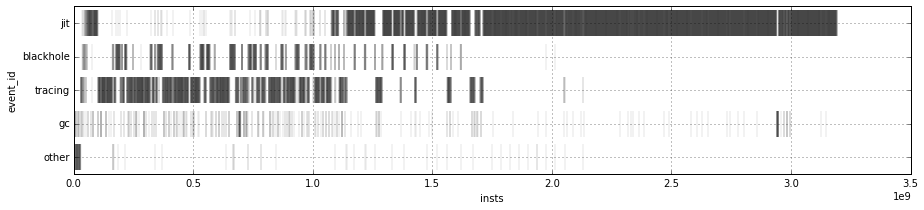

In [309]:
raw = activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_richards_mini.stage3.csv" )

In [310]:
find_event( raw, 1.7e9, 1e8 )

((1749624336.0, 560.0), (1862962280.0, 566.0))

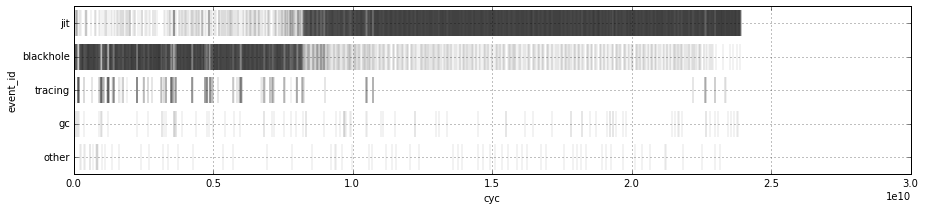

In [241]:
activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_richards_mini2.csv" )

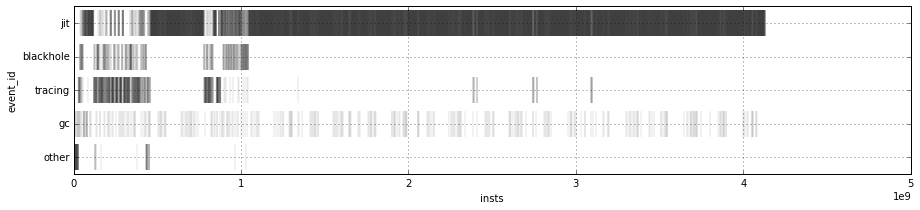

In [311]:
raw = activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_regex_effbot_mini.stage3.csv" )

In [312]:
find_event( raw, 0.6e9, 1e8 )

((790571333.0, 286.0), (895079444.0, 295.0))

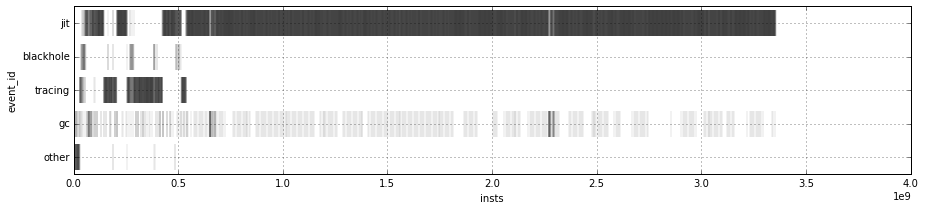

In [313]:
raw = activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_pickle_mini.stage3.csv" )

In [320]:
find_event( raw, 0.399e9, 1e8 )

((399378798.0, 79.0), (501768755.0, 93.0))

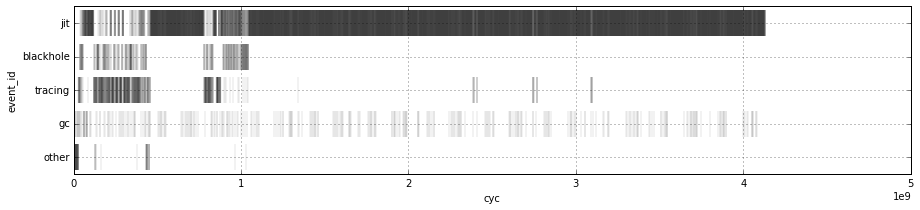

In [245]:
activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_regex_effbot_mini_eager1.csv" )

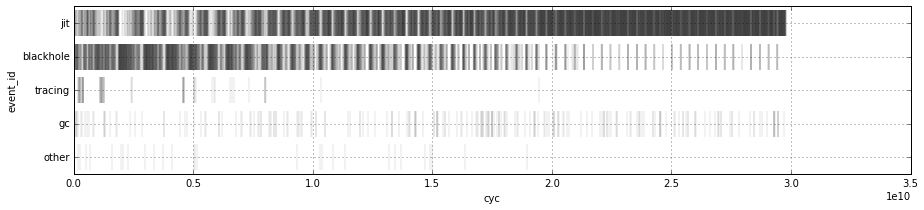

In [238]:
activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_regex_effbot_mini2.csv" )

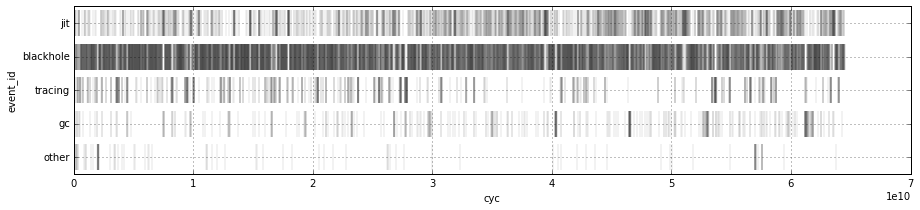

In [237]:
activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_html5lib_mini.csv" ) 

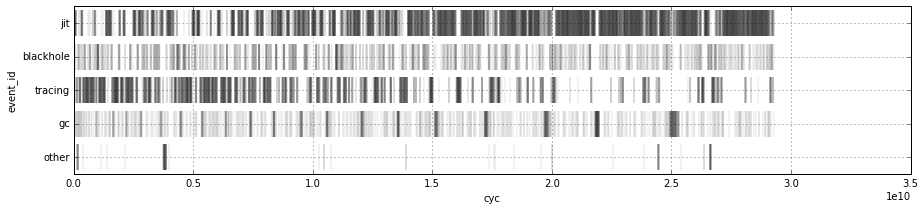

In [236]:
activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_html5lib_mini_eager1.csv" ) 

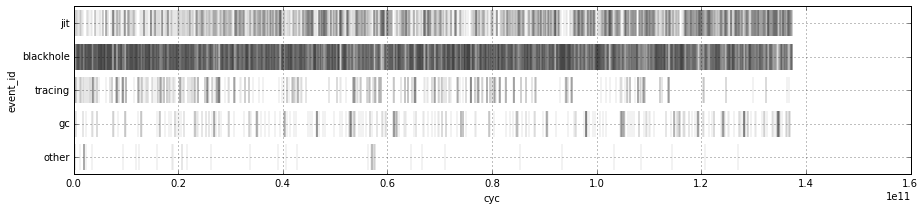

In [235]:
activity_plot_from_csv( "../pypy-benchmarks/unladen_swallow/performance/outs/event_file_bm_html5lib_mini2.csv" ) 

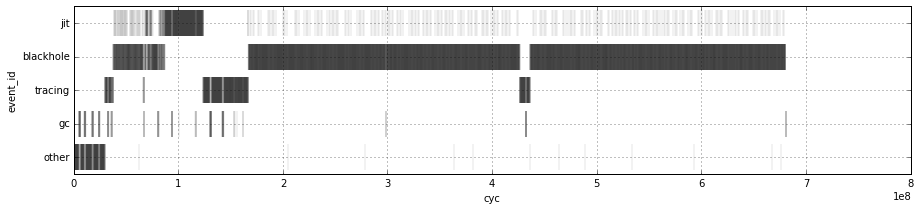

In [212]:
# ubmarks
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd.csv" ) 

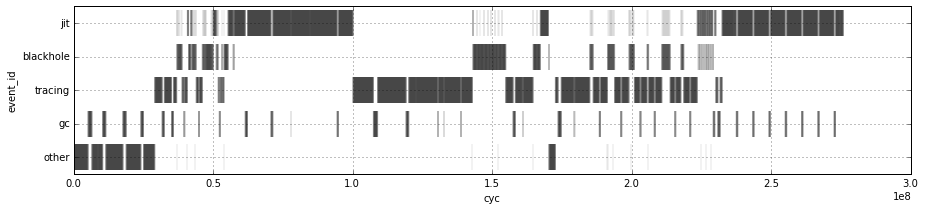

In [248]:
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd_eager.csv" ) 

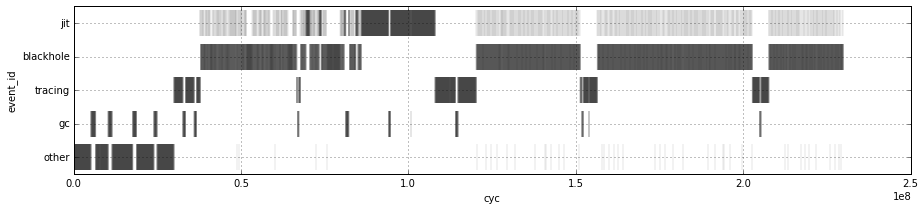

In [256]:
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd0.csv" ) 

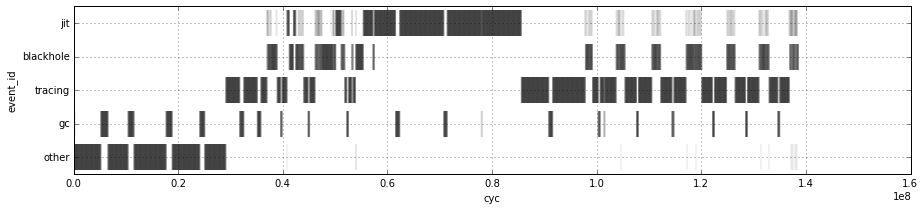

In [257]:
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd0_eager.csv" ) 

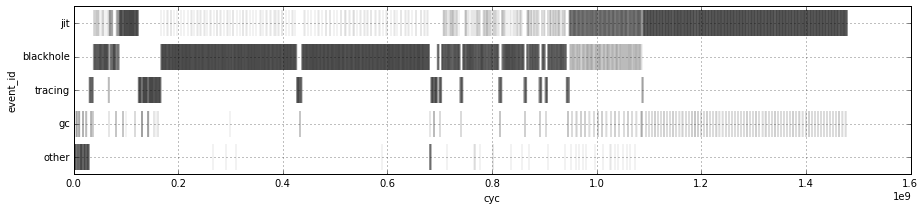

In [234]:
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd2.csv" ) 

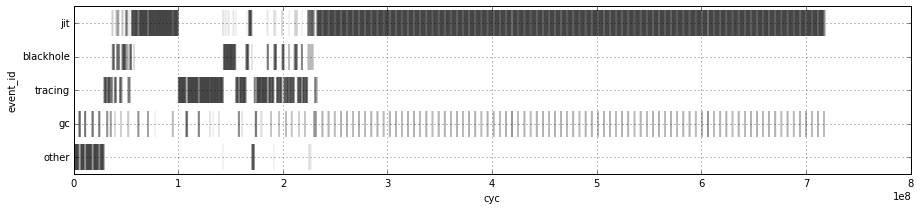

In [246]:
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd2_eager.csv" ) 

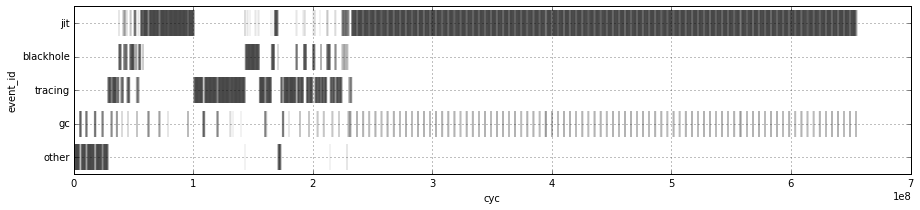

In [249]:
activity_plot_from_csv( "../brg-ubmark/outs/event_file_vvadd2_eager_omit.csv" ) 

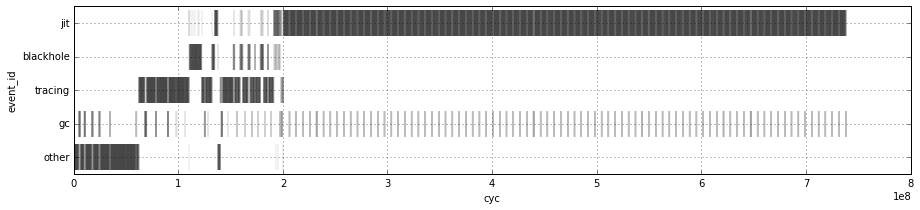

In [251]:
activity_plot_from_csv( "/work/bits0/bi45/vc/git-brg/gem5-mcpat/eval/event_file_vvadd_eager.csv" ) 

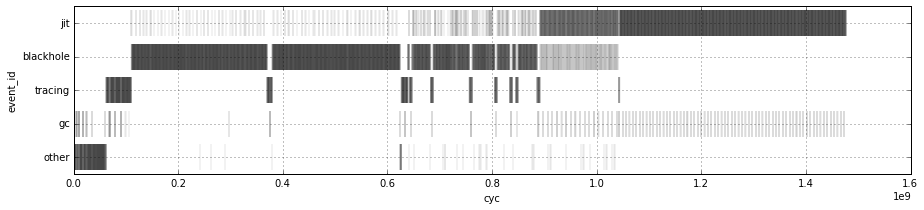

In [252]:
activity_plot_from_csv( "/work/bits0/bi45/vc/git-brg/gem5-mcpat/eval/event_file_vvadd.csv" ) 

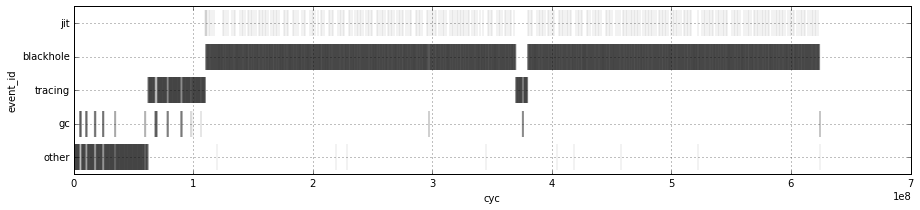

In [253]:
activity_plot_from_csv( "/work/bits0/bi45/vc/git-brg/gem5-mcpat/eval/event_file_vvadd1.csv" ) 

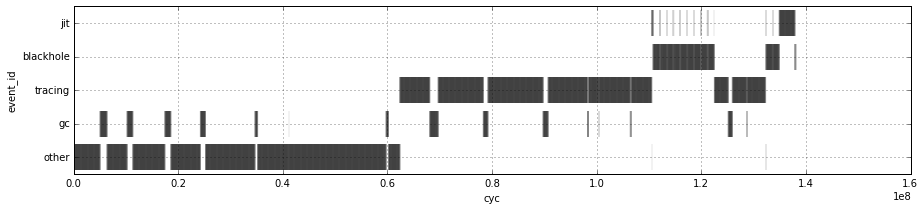

In [254]:
activity_plot_from_csv( "/work/bits0/bi45/vc/git-brg/gem5-mcpat/eval/event_file_vvadd1_eager.csv" ) 